# 0.0 IMPORTS



In [ ]:
!pip install inflection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import math
import pandas as pd
import inflection
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


## 0.1 Funções Auxiliares


## 0.2 Carregamento dos dados

In [ ]:
df_sales_raw = pd.read_csv('/content/drive/MyDrive/DS_em_prod/train.csv', low_memory = False)
df_store_raw = pd.read_csv('/content/drive/MyDrive/DS_em_prod/store.csv', low_memory = False)

#Merge

df_raw = pd.merge(df_sales_raw, df_store_raw, how ='left', on='Store')


# 1.0 ANÁLISE DESCRITIVA


## 1.1 Renomear Colunas

In [ ]:
df1 = df_raw.copy()

In [ ]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
#Transformar colunas em Snakecase
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

df1.columns = cols_new


## 1.2 Data Dimensions

In [ ]:
print( f'Numero de Linhas: {df1.shape[0]}')
print( f'Numero de Coluns: {df1.shape[1]}')

Numero de Linhas: 1017209
Numero de Coluns: 18


## 1.3 Tipos de Dados

In [ ]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

In [ ]:
#Convert to data to category
category_data_list = ['store','open', 'promo', 'state_holiday', 'school_holiday',
   'store_type', 'assortment', 'promo2']

for column in category_data_list:
  df1[column] = df1[column].astype('category')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   store                         1017209 non-null  category      
 1   day_of_week                   1017209 non-null  int64         
 2   date                          1017209 non-null  datetime64[ns]
 3   sales                         1017209 non-null  int64         
 4   customers                     1017209 non-null  int64         
 5   open                          1017209 non-null  category      
 6   promo                         1017209 non-null  category      
 7   state_holiday                 1017209 non-null  category      
 8   school_holiday                1017209 non-null  category      
 9   store_type                    1017209 non-null  category      
 10  assortment                    1017209 non-null  category      
 11

In [ ]:
df1.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 1.4 Checar por Nulos

In [ ]:
df1.isna().sum()
# Jogar Linhas Foras x Joga dados Foras
# Algorítimos de Machine Learning, ou Média ou Mediana
# Entender do negócio 

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance                 0
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

##1.5 Preencher NA's



In [ ]:
#competition_distance              2642
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

**Raciocínio**: Supus que os valores são nulos, pois os competidores estão à uma distância muito grande e não são contabilizados.

In [ ]:
#competition_open_since_month 

df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month
                                if math.isnan(x['competition_open_since_month']) 
                                else x['competition_open_since_month'], axis=1)


In [ ]:
#competition_open_since_year
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year
                                if math.isnan(x['competition_open_since_year']) 
                                else x['competition_open_since_year'], axis=1)


In [ ]:
#promo2_since_week        
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week
                                if math.isnan(x['promo2_since_week']) 
                                else x['promo2_since_week'], axis=1)


In [ ]:
#promo2_since_year 
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year
                                if math.isnan(x['promo2_since_year']) 
                                else x['promo2_since_year'], axis=1)


In [ ]:
#promo_interval
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec' }

df1['promo_interval'].fillna(0, inplace=True)
df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [ ]:
#Mudar tipo dos dados que faltavam
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [ ]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object


## 1.6 Estatistica descritiva


In [ ]:
#Separação dos dados em numéricos e categóricos
num_attributes = df1.select_dtypes(include= ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])


### 1.6.1 Atributos Numéricos



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda1f5c4910>,
      dtype=object)

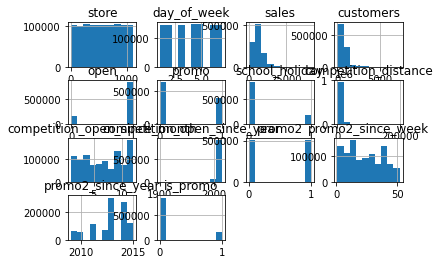

In [ ]:
#Distribuição
num_attributes.hist(bins = 10)

In [ ]:
#Tendencia central

ct1 = pd.DataFrame( num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame( num_attributes.apply(np.median)).T

#Métricas de Dispersão

d1 = pd.DataFrame( num_attributes.apply(np.std)).T
d2 = pd.DataFrame( num_attributes.apply(min)).T
d3 = pd.DataFrame( num_attributes.apply(max)).T
d4 = pd.DataFrame( num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame( num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame( num_attributes.apply(lambda x: x.kurtosis())).T


mtc = pd.concat([d2, d3, d4 , ct1, ct2, d1, d5, d6]).T.reset_index()
mtc.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [ ]:
mtc

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### 1.6.2 Atributos Categóricos

In [ ]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

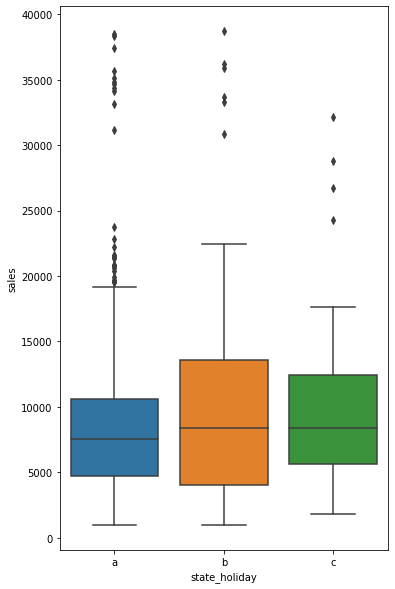

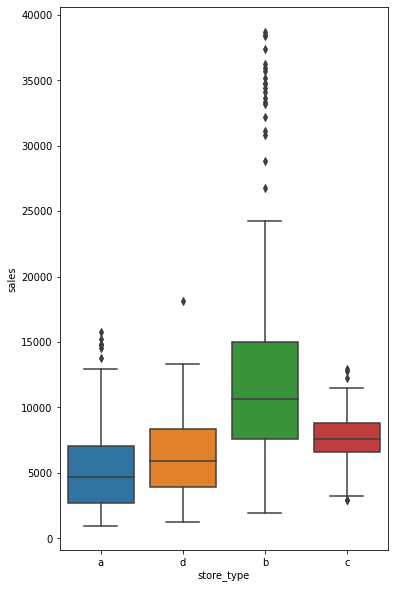

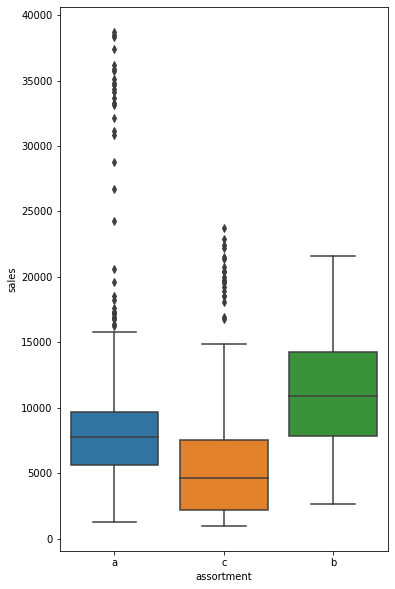

In [ ]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.figure(figsize = (20, 10))
plt.subplot(1, 3, 1)
sns.boxplot(x = 'state_holiday', y='sales', data = aux1)

plt.figure(figsize = (20, 10))
plt.subplot(1, 3, 2)
sns.boxplot(x = 'store_type', y='sales', data = aux1)

plt.figure(figsize = (20, 10))
plt.subplot(1, 3, 3)
sns.boxplot(x = 'assortment', y='sales', data = aux1)

# 2.0 Engenharia de Atributos



# 3.0 EDA
